# Bayesian Statistics an introduction with James Harden

## Buzzwords

### an update Dec 2023

Bayesian is cool but just a way to model beliefs. Probability statements need CALIBRATION.


Bayesian statistics isn't new, it's been around since thomas bayes came up with it back in the 1700s. The formula is derived just with some substituting and rearranging nothing fancy but this shift in perspective gives us a whole new way of looking at things - a new philosophy.

__The Frequentist__ - The OG: 
The old school (well before 1700 I guess) philosophy says that there is only one true answer and at the heart of this attitude is the belief that a true answer already exists. Buuuuuuuuuut, to measure it you must take a large number of samples and find the most _frequent_ one. Thats your true value! Why we have to take a large amount because we believe that every measurement comes with a little error.

E.G:
The height of a mountain.
Say we take measurements of the height of a mountain in km:
5000
4999
5000
4999
5000
4998
...
5000

it's looking like our mountains true height value is close to 5000


#### But the Bayesian

The Bayesian thinks a little different, he believes every observation has some information in it and the bayesian attitude is believing that there isn't one true value for your process but in fact a distribution. So with the mountain before, a Bayeisn would say that the true value of the height of the mountain is a meaningless idea. Instead, every measurement of the height of the mountain describes some point on the ground to some point near the top of the mountain but they wont be the identical two points every time. so even though every measurement has a different value, each one is an accurate measurement of something we could call the height of the mountain.


### Theory

A little theory goes a long way so the structure of the rest of the article will go as follows

- Describing the mechanics of bayesian statistics
- Explaining the essential terms
- An example to demonstrate how bayesian models work

## Mechanics

### Conditional Probability 

Bayes Theorem is a result from conditional probability 

- Condional Probability formula: $P(A|B) = \frac{P(A \cap B)}{P(B)}$

I remember when I was first learning this my teacher told me to bend the bar and divide by the given event. Safe to say that the intuition behind what was happening really didnt stick and I just ended up remembering like a computer instead of a human. So what is really going on here?

The probability of A _GIVEN_ B means the probability of A happening if we know that B has already happened


Diagrams always help

In [ ]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

venn2(subsets = (0.65, 0.25, 0.1), set_labels = ('Event A', 'Event B'))

We want to find out the probability of A happening if B has already happened. 

The Probability of B happening is 0.35
The Probability that A will happen after B has already happened is 0.1

So the Probability of A happening _given_ B = $P(A|B) = \frac{P(A \cap B)}{P(B)}$ = $\frac{0.1}{0.35}$ = 0.29

#### How does Bayes theorem come out of this? well

[1] $P(A|B) = \frac{P(A \cap B)}{P(B)}$

but! 

[2] $P(A \cap B) = P(B \cap A)$

and 

[3] $P(B|A) = \frac{P(B \cap A)}{P(A)}$

so rearranging and subbing [3] into [2] and then that into [1] you get the following

### Bayes Theorem

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

# So what do the terms mean? 
im gonna swap out the A's and B's for X's and Y's now and add a context. 

X is your Data - Say about flowers, maybe the features are height, colour, number of leaves
Y is your Target - Whether your flower is a rose or not

So the main idea in bayesian statistics is that we have a _prior_ belief about what the Target is. Typically in the form of a probability distribution. We multiply this distribution by the _liklihood_ of our data and to get a new probability distribution divide it by _the evidence_ but here evidence doesn't mean something you'd find in a crime scene. The evidence is the probability of getting our data over all potential outcomes. This result gives us our _posterior_ belief about our Target. 

$P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)}$

- $P(Y)$: ***The Prior*** - our prior belief about the target, in the real world this could be an assumption, experts intuition or previous experiments result.


- $P(X|Y)$: ***The Liklihood*** - this is the probability that we see the data given the targets, meditate on this for a second. The probability of seeing the data given that the targets are the same. Could you have different data but the same targets? ... 


- $P(Y|X)$: ***The Posterior*** - Our updated belief about the target

- $P(X)$: ***The Evidence*** - This is the probability of seeing the data over all possible targets/ the probability of the data emerging by any means at all.


It took me a minute but now I see that it's very intuitive. You have a world view about a topic, you collect data about it and that shifts your world view shifts. The amount it shifts is relative to how relavent your data was to the target.

##### digressive

- The distribution is an object, you can do stuff to it, so say you're doing a multiple choice question and you didnt study so you have no idea what the answer is. a=b=c=d=25% then you go and study and learn more stuff and the probability starts shifting around because you're getting smarter until you think you're start enough o find a value you're confident with and then say fuck it. That threshold determines how risky you want to be.


- It's kinda like a weighted average innit?

# An example

As you might've guess from my previous blog posts im a massive NBA fan so we're looking at a basketball example.

As you might've seen recently James harden was traded to the 76ers for Ben Simmons!

and that's inspired me to try and model hardens scoring numbers over the last few seasons as an introductory motivator on bayesian statistics. 

What we will be modelling is if his scoring numbers have changed over time. Suddenly or Gradually. 

### How we're going to model it

We can use the Poison Distribution to model Hardens scoring numbers

$H_{i} \sim Poisson(\lambda)$

The Poisson distriubtion is good for modelling counts and rates.

- $\lambda$: This is a _PARAMETER_ of our distribution, it controls the distributions shape. Other famous parameters you might know include the mean and std of the Normal distribution.

Our goal essentially is to _estimate_ this parameter lambda but it's a bit more nuanced than that. The idea is that hardens scoring rate can be modelled using a poisson distribution with paramter $\lambda$ but we want to find when/if his scoring changes.

To find out if his scoring rate actually changes we will be trying to find 

- $\lambda_{1}$ which is his scoring rate before a certain time say $\tau$
- $\lambda_{2}$ and this is his scoring rate after $\tau$


**So our goal is to estimate $\lambda_{1}$, $\lambda_{2}$ and $\tau$**
(I.e What is his scoring rate before, what is his scoring rate after and approximately when did it change?) 

We're going to need some priors(our inital/prior belief about the parameter before we encounter some data)


**Priors for $\lambda_{1}$, $\lambda_{2}$**

- $\lambda_{1} \sim Exp(\alpha) $ 
- $\lambda_{2} \sim Exp(\alpha) $

Why exponential?

The exponential gives us a distribution over all positive numbers so it could be a good choice to model $\lambda$ but we could have easily used a normal distribution too (which we might try after this example)

The exponential distribution takes it's own parameter called $\alpha$, this is a _hyperparameter_/_Parent Variable_ its a parameter that influences other parameters. 

A good rule of thumb is to set $\alpha$ as as the inverse of the average of the counts. $\frac{1}{averageOfCounts}$

- What about $\tau$:

because of the noise in the data, good games vs bad games etc. It can be hard to choose when $\tau$ might've occured so we set a flat probability amoungst all the games

i.e. $\tau$ $\sim$ DiscreteUniform(1,number of games)


There are a lot of moving pieces here, $\lambda$'s, $\tau$'s etc but before we go and start using tools we need to gather our data, below is a simple script to get hardens scoring data

### Get the data

In [90]:
#imports 
from nba_api.stats.endpoints import playergamelog #will get us the players box score numbers per game for each season
from nba_api.stats.static import players #gives us a list of players
import pandas as pd  
import numpy as np 

In [74]:
# players_df = pd.DataFrame(players.get_active_players())
# jh_id = players_df[players_df.full_name.str.contains('James Harden')].id.iloc[0]

# seasons = [f'20{x}-{x+1}' for x in range(10,22)]
# seasons.insert(0, '2009-10')

# dfs = []

# for season in seasons:
#     dfs.append(playergamelog.PlayerGameLog(str(jh_id), season=season).get_data_frames()[0])

# df = pd.concat(dfs)

# df.to_csv('james_harden.csv', index=False)

In [75]:
df = pd.read_csv('james_harden.csv')

In [81]:
#looking at last 5 seasons worth of data 
points = df[df.SEASON_ID.isin([22017,22018,22019,22020,22021])]['PTS'].reset_index(drop=True)

<AxesSubplot:ylabel='Frequency'>

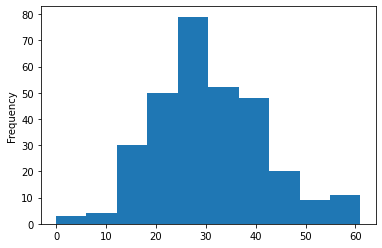

In [83]:
#quick plot to see the distribution over the last 5 years, looks like a normal dist centered 
#around 27 maybe that would've been a better choice but we can try that after

points.plot(kind='hist')

<AxesSubplot:>

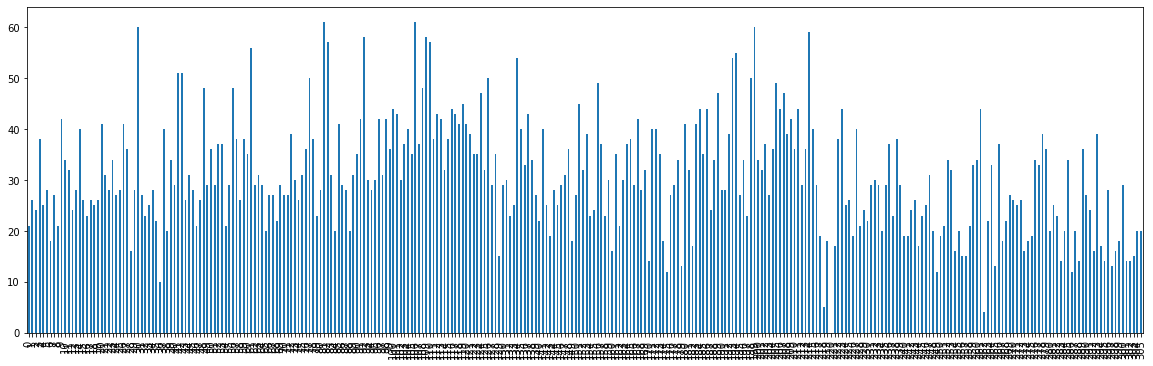

In [84]:
#the games plotted as bars across time
points.plot(kind='bar', figsize=(20,6))

In [86]:
import pymc3 as pm

with pm.Model() as model:
    
    #whatever we had above in our modelling methodology section we've just translated into
    #code
    
    #priors
    alpha = 1.0/points.mean()
    
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower = 0, upper=305)

We defined the regular $\lambda$ as 

$$ \lambda = \left\{
                    \begin{array}{11}
                    \lambda_{1} & t\gt\tau \\
                    \lambda_{2} & t\geq\tau \\
                    \end{array}
             \right. $$
        
        
To illustrate this as code

In [94]:
with model:
    idx = np.arange(points.shape[0])
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2) #also a RV!

In [95]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=points)

In [98]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune = 5000, step=step, return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 19 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [99]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

Text(0.5, 1.0, 'Posterior Distributions of Lambda')

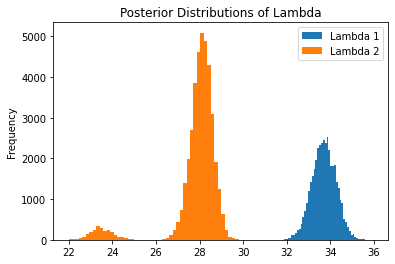

In [121]:
pd.Series(lambda_1_samples).plot(kind='hist', bins=50, label='Lambda 1', legend=True)
pd.Series(lambda_2_samples).plot(kind='hist', bins=50, label='Lambda 2', legend=True)
plt.title('Posterior Distributions of Lambda')

What we have above is the histogram/distribution of values for our posterior. Narrower distributions are more confident. We can also see a _CLEAR_ difference in scoring from around 33.75 to 28! so Harden's scoring did drop off! But when ...?

quick note: The distributions are not exponential looking! Our model learned the posterior to be Gaussian! we should experiment with Gaussian priors to see the effect on the model (but im sure it'll be minimal)

Text(0.5, 1.0, 'Posterior Distribution of Tau')

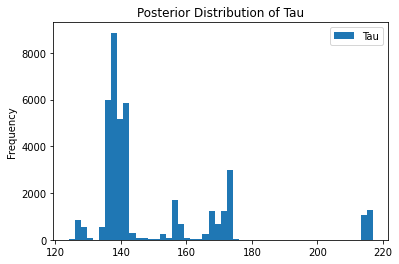

In [122]:
pd.Series(tau_samples).plot(kind='hist', bins=50, label='Tau', legend=True)
plt.title('Posterior Distribution of Tau')

We can see that changes were likely to have happened around day 140 but other days have change potential too

This could mean a few different things some of which include...

- Hardens scoring rate has changed way more than two times
- He had stretches of bad games 


###### These articles are subject to revision because learning is a journey 